In [1]:
include("C:/Users/mussi/Documents/Manhattan/Leuven/MCQMC/Data_Libraries/WCUD_array.jl")
include("C:/Users/mussi/Documents/Manhattan/Leuven/MCQMC/MCQMC/1.1.Linear_Gibbs.jl")
# include("C:/Users/mussi/Documents/Manhattan/Leuven/MCQMC/MCQMC/1.2.Probit_Gibbs.jl")
# include("C:/Users/mussi/Documents/Manhattan/Leuven/MCQMC/UbMCQMC/Linear/1.4.1.R_Replicates.jl")
# include("C:/Users/mussi/Documents/Manhattan/Leuven/MCQMC/UbMCQMC/Probit/2.3.R_Replicates.jl")
# include("C:/Users/mussi/Documents/Manhattan/Leuven/MCQMC/MCQMC/1.3.Hier_Poisson_Gamma.jl")

  Activating project at `C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries`
Precompiling project...
  18036.0 ms  ✓ Libmount_jll
   1025.2 ms  ✓ Pango_jll
  2 dependencies successfully precompiled in 110 seconds. 588 already precompiled.


BLR_gibbs_sampler (generic function with 2 methods)

In [2]:
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\Pts\\" 
true_vec = vec(CSV.read(folder_path * "2.12rng_true.txt", Tables.matrix; header=false))

vec_wcud_10 = open(folder_path * "harase_10.txt", enc"UTF-16LE") do io
    parse.(Float64, replace.(eachline(io), "\ufeff" => ""))
end;

vec_wcud_11 = open(folder_path * "harase_11.txt", enc"UTF-16LE") do io
    parse.(Float64, replace.(eachline(io), "\ufeff" => ""))
end;

vec_wcud_12 = open(folder_path * "harase_12.txt", enc"UTF-16LE") do io
    parse.(Float64, replace.(eachline(io), "\ufeff" => ""))
end;

vec_wcud_13 = open(folder_path * "harase_13.txt", enc"UTF-16LE") do io
    parse.(Float64, replace.(eachline(io), "\ufeff" => ""))
end;

vec_wcud_14 = open(folder_path * "harase_14.txt", enc"UTF-16LE") do io
    parse.(Float64, replace.(eachline(io), "\ufeff" => ""))
end;

In [3]:
sobol_15d_10 = CSV.read(folder_path * "sobol_15d_10.txt", Tables.matrix; header=false, delim=' ', ignorerepeated=true);
sobol_15d_11 = CSV.read(folder_path * "sobol_15d_11.txt", Tables.matrix; header=false, delim=' ', ignorerepeated=true);
sobol_15d_12 = CSV.read(folder_path * "sobol_15d_12.txt", Tables.matrix; header=false, delim=' ', ignorerepeated=true);
sobol_15d_13 = CSV.read(folder_path * "sobol_15d_13.txt", Tables.matrix; header=false, delim=' ', ignorerepeated=true);
sobol_15d_14 = CSV.read(folder_path * "sobol_15d_14.txt", Tables.matrix; header=false, delim=' ', ignorerepeated=true);

In [8]:
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\\"
df_boston = CSV.read(folder_path * "DB_Boston.txt", DataFrame)
M_boston = Matrix(df_boston)
n,p = size(M_boston)

Y = log.(M_boston[:, end])
X = [ones(r,1)  M_boston[:, 1:end-1]]           # incercept
X[:,6] = X[:,6].^2
X[:,7] = X[:,7].^2
X[:,9] = log.(X[:,9])
X[:,10] = log.(X[:,10])
X[:,14] = log.(X[:,14]);

$$\hat{\beta} = (X^\top X)^{-1} X^\top y$$

$$\widehat{\text{Var}}(\hat{\beta}_j) = 
\frac{\lVert y - X\hat{\beta} \rVert^2}{\,n - p\,} \; \big[(X^\top X)^{-1}\big]_{jj}$$

### **LINEAR REGRESSION MODEL**

##### **OLS: Comparison**

In [110]:
@time ols = lm(X, Y)

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
────────────────────────────────────────────────────────────────────────────
            Coef.   Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────
x1    4.56578      0.154755      29.50    <1e-99   4.26172       4.86984
x2   -0.011835     0.00124547    -9.50    <1e-19  -0.0142821    -0.00938789
x3    5.17744e-5   0.000506807    0.10    0.9187  -0.000944004   0.00104755
x4    4.30655e-5   0.00237506     0.02    0.9855  -0.00462346    0.00470959
x5    0.0912068    0.0332114      2.75    0.0062   0.0259528     0.156461
x6   -0.634756     0.113236      -5.61    <1e-07  -0.857242     -0.41227
x7    0.00628201   0.00131369     4.78    <1e-05   0.00370087    0.00886316
x8    0.000110762  0.00052691     0.21    0.8336  -0.000924515   0.00114604
x9   -0.190859     0.03340

  0.010937 seconds (39 allocations: 127.956 KiB)


In [5]:
X_mini = X[1:30,:]; Y_mini = Y[1:30];
@time ols_mini = lm(X_mini, Y_mini) 

UndefVarError: UndefVarError: `X` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
X_mini = X[1:250,:]; Y_mini = Y[1:250];

### **Biased vs Unbiased MCQMC**

In [10]:
wcud_12_10 = digit_shift_mat(vec_wcud_12, p+1 , 10);
N = (2^12)-1; burn_in = 500; R = 10
biased_linear_wcud_12_10 = R_Fkm(R, N, wcud_12_10, blm, burn_in, f);

println(DataFrame(
                    Coeff    = biased_linear_wcud_12_10.mu_pool,
                    Std_Err  = sqrt.(biased_linear_wcud_12_10.sigma_pool)
                ))

UndefVarError: UndefVarError: `R_Fkm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [11]:
@time F_Lin_wcud_12_10 = R_UbFkm(R, N, wcud_12_10, blm, burn_in, f);

println(DataFrame(
                    Coeff    = F_Lin_wcud_12_10.mu_pool,
                    Std_Err  = sqrt.(F_Lin_wcud_12_10.sigma_pool)
                ))

UndefVarError: UndefVarError: `R_UbFkm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### **UnMCQMC**   

#### **Whole vs mini dataset for 2^12 IIDs**

In [18]:
# Parameter initialisation -- pag 14 (He, and Du 2024) --
p = size(X, 2); b0= zeros(p); B0= Matrix{Float64}(I, p, p)*100; n0=5.0; s0=0.01
blm = UnMCQMC_linear(p, Y, X, b0, B0, n0, s0);
f = x -> x

#53 (generic function with 1 method)

In [ ]:
N = (2^12)-1; burn_in = 8; R = 100 
Random.seed!(1234) 
iid_12_100 = rand(p+1, N, R)
@time F_Lin_iid_12_100 = R_UbFkm(R, N, iid_12_100, blm, burn_in, f);

println(DataFrame(
                    Coeff    = F_Lin_iid_12_100.mu_pool,
                    Std_Err  = sqrt.(F_Lin_iid_12_100.sigma_pool)
                ))

rmse_iid_12 = sqrt(sum(F_Lin_iid_12_100.sigma_pool))
println("RMSE:", rmse_iid_12)

 95.462463 seconds (308.99 M allocations: 237.391 GiB, 17.28% gc time)
15×2 DataFrame
 Row │ Coeff         Std_Err     
     │ Float64       Float64     
─────┼───────────────────────────
   1 │  4.56474      0.000253239
   2 │ -0.0118328    1.919e-6
   3 │  5.17019e-5   8.22982e-7
   4 │  5.03105e-5   3.71774e-6
   5 │  0.091277     5.53989e-5
   6 │ -0.634761     0.000188027
   7 │  0.00629139   2.21115e-6
   8 │  0.000110844  8.45598e-7
   9 │ -0.190709     5.16559e-5
  10 │  0.0930847    2.88507e-5
  11 │ -0.000406025  1.8563e-7
  12 │ -0.0313073    6.77547e-6
  13 │  0.000363204  1.73236e-7
  14 │ -0.372522     3.92425e-5
  15 │  0.0331203    3.30985e-6
0.00032813805798404504


In [6]:
# Definition blm mini model
p = size(X, 2); b0= zeros(p); B0= Matrix{Float64}(I, p, p)*100; n0=5.0; s0=0.01
blm_mini = UnMCQMC_linear(p, Y[1:40], X[1:40,:], b0, B0, n0, s0);

In [7]:
N = (2^12)-1; burn_in = 8; R = 100 
f = x -> x
Random.seed!(1234) 
iid_12_100 = rand(p+1, N, R)

@time mini_F_Lin_iid_12_100 = R_UbFkm(R, N, iid_12_100, blm_mini, burn_in, f);

println(DataFrame(
                    Coeff    = mini_F_Lin_iid_12_100.mu_pool,
                    Std_Err  = sqrt.(mini_F_Lin_iid_12_100.sigma_pool)
                ))

  5.596372 seconds (20.14 M allocations: 7.925 GiB, 37.77% gc time, 4.00% compilation time)
15×2 DataFrame
 Row │ Coeff         Std_Err     
     │ Float64       Float64     
─────┼───────────────────────────
   1 │  2.00366      0.00226876
   2 │ -0.235258     0.000172512
   3 │ -0.00826209   1.51449e-5
   4 │ -0.192112     0.000201818
   5 │  0.0213106    0.0167987
   6 │ -0.173319     0.0155998
   7 │  0.0209958    1.07641e-5
   8 │ -0.00463703   2.06522e-6
   9 │ -0.363793     0.000442556
  10 │ -1.02751      0.00103161
  11 │  0.0174651    2.94298e-5
  12 │ -0.0527192    4.64712e-5
  13 │  0.000569573  9.98695e-7
  14 │ -0.0883494    0.000131946
  15 │  0.00991559   4.81831e-6


In [19]:
rmse_iid_12_mini = sqrt(sum(mini_F_Lin_iid_12_100.sigma_pool))
println("RMSE:", rmse_iid_12_mini)

RMSE:0.023066159116839204


#### **Whole vs mini dataset for 2^12 wcud pts**

In [ ]:
# WHOLE DATA SET HARASE'S PTS
p = size(X, 2)
wcud_12_100 = digit_shift_mat(vec_wcud_12, p+1 , 100);
N = (2^12)-1; burn_in = 8; R = 100 
@time F_Lin_wcud_12_100 = R_UbFkm(R, N, wcud_12_100, blm, burn_in, f);

println(DataFrame(
                    Coeff    = F_Lin_wcud_12_100.mu_pool,
                    Std_Err  = sqrt.(F_Lin_wcud_12_100.sigma_pool)
                ))

rmse_wcud_12 = sqrt(sum(F_Lin_wcud_12_100.sigma_pool))
println("RMSE:", rmse_wcud_12)

 97.770648 seconds (346.88 M allocations: 266.884 GiB, 17.30% gc time)
15×2 DataFrame
 Row │ Coeff         Std_Err    
     │ Float64       Float64    
─────┼──────────────────────────
   1 │  4.56463      6.03721e-6
   2 │ -0.0118346    6.58999e-8
   3 │  5.23351e-5   4.15342e-8
   4 │  4.42996e-5   1.50963e-7
   5 │  0.0912126    9.04226e-7
   6 │ -0.63435      1.28773e-5
   7 │  0.00628804   6.52536e-8
   8 │  0.000110781  5.53978e-8
   9 │ -0.190755     2.05341e-6
  10 │  0.0930813    1.03231e-6
  11 │ -0.000406105  8.48659e-9
  12 │ -0.0312886    2.83972e-7
  13 │  0.000363215  5.78583e-9
  14 │ -0.372564     1.95439e-6
  15 │  0.0331238    1.15665e-7


In [ ]:
# MINI DATA SET HARASE'S PTS
N = (2^12)-1; burn_in = 8; R = 100
@time mini_F_Lin_wcud_12_100 = R_UbFkm(R, N, wcud_12_100, blm_mini, burn_in, f);

println(DataFrame(
                    Coeff    = mini_F_Lin_wcud_12_100.mu_pool,
                    Std_Err  = sqrt.(mini_F_Lin_wcud_12_100.sigma_pool)
                ))

rmse_wcud_12_mini = sqrt(sum(mini_F_Lin_wcud_12_100.sigma_pool))
println("RMSE:", rmse_wcud_12_mini)

  6.231787 seconds (24.61 M allocations: 11.504 GiB, 33.53% gc time)
15×2 DataFrame
 Row │ Coeff         Std_Err     
     │ Float64       Float64     
─────┼───────────────────────────
   1 │  2.00268      6.81774e-5
   2 │ -0.235425     9.65596e-6
   3 │ -0.00826017   6.02629e-7
   4 │ -0.192277     9.58226e-6
   5 │ -0.000400455  0.000249797
   6 │ -0.159401     0.000635584
   7 │  0.0209929    4.86202e-7
   8 │ -0.00464019   1.64608e-7
   9 │ -0.36426      2.59609e-5
  10 │ -1.02847      5.32976e-5
  11 │  0.0174677    1.19981e-6
  12 │ -0.0527596    3.08103e-6
  13 │  0.000570937  4.60379e-8
  14 │ -0.0882104    8.94432e-6
  15 │  0.00991795   5.11495e-7


#### **Whole vs mini dataset 2^12 d-dim Sobol pts**

In [10]:
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\Pts\\" 
sobol_12_d15 = CSV.read(folder_path * "sobol_15d.txt", Tables.matrix; header=false, delim = ' ', ignorerepeated = true);
array_sobol_12_d15 = digital_shift(sobol_12_d15[2:end,:], 100);          # digital shift on d-dim sobol (no zero vector, since there the inverse probability function is not defined)
size(array_sobol_12_d15)

(15, 4095, 100)

In [ ]:
# Whole data set with d-dim Sobol sequence
N = (2^12)-1; burn_in = 8; R = 100 
@time F_Lin_sob_12_100 = R_UbFkm(R, N, array_sobol_12_d15, blm, burn_in, f);

println(DataFrame(
                    Coeff    = F_Lin_sob_12_100.mu_pool,
                    Std_Err  = sqrt.(F_Lin_sob_12_100.sigma_pool)
                ))

rmse_sob_12 = sqrt(sum(F_Lin_sob_12_100.sigma_pool))
println("RMSE:", rmse_sob_12)

113.747912 seconds (396.42 M allocations: 305.450 GiB, 16.76% gc time)
15×2 DataFrame
 Row │ Coeff         Std_Err    
     │ Float64       Float64    
─────┼──────────────────────────
   1 │  4.56464      9.29425e-6
   2 │ -0.0118346    8.36484e-8
   3 │  5.22632e-5   3.21229e-8
   4 │  4.42411e-5   2.9921e-7
   5 │  0.0912183    1.90617e-6
   6 │ -0.634354     7.6496e-6
   7 │  0.00628808   8.71285e-8
   8 │  0.000110771  3.14546e-8
   9 │ -0.190754     2.23221e-6
  10 │  0.0930807    1.26788e-6
  11 │ -0.000406096  8.57883e-9
  12 │ -0.0312891    3.35855e-7
  13 │  0.000363192  6.17401e-9
  14 │ -0.372564     1.57002e-6
  15 │  0.0331229    1.41543e-7


In [12]:
# Mini data set with d-dim Sobol sequence
N = (2^12)-1; burn_in = 8; R = 100
@time mini_F_Lin_sob_12_100 = R_UbFkm(R, N, array_sobol_12_d15, blm_mini, burn_in, f);

println(DataFrame(
                    Coeff    = mini_F_Lin_sob_12_100.mu_pool,
                    Std_Err  = sqrt.(mini_F_Lin_sob_12_100.sigma_pool)
                ))

  6.775462 seconds (20.54 M allocations: 8.333 GiB, 38.68% gc time)
15×2 DataFrame
 Row │ Coeff         Std_Err     
     │ Float64       Float64     
─────┼───────────────────────────
   1 │  2.00312      0.000146534
   2 │ -0.235419     1.23293e-5
   3 │ -0.0082613    8.48951e-7
   4 │ -0.192293     1.96102e-5
   5 │  0.00132068   0.000561546
   6 │ -0.160228     0.0011334
   7 │  0.0209909    8.58269e-7
   8 │ -0.00463967   2.00742e-7
   9 │ -0.364337     6.42811e-5
  10 │ -1.02856      9.42384e-5
  11 │  0.0174697    1.60562e-6
  12 │ -0.0527712    7.24774e-6
  13 │  0.000570683  9.61474e-8
  14 │ -0.0882471    1.47017e-5
  15 │  0.00985082   3.92778e-7


In [24]:
rmse_sob_12_mini = sqrt(sum(mini_F_Lin_sob_12_100.sigma_pool))
println("RMSE:", rmse_sob_12_mini)

RMSE:0.0012787624947694668


#### **Digital Nets (The Magic Point Shop; nxs32m32.col)**

In [23]:
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\Pts\\" 

dig_net_12_d15 = open(folder_path * "nx_15d_10.csv", enc"UTF-16LE") do io
    CSV.read(IOBuffer(read(io, String)), Tables.matrix; header=false, delim=',')
end

# array_dig_net_d15 = digital_shift(dig_net_12_d15[2:end,:], 100);          # digital shift on d-dim sobol (no zero vector, since there the inverse probability function is not defined)

1024×1 Matrix{String}:
 "0                         0    " ⋯ 329 bytes ⋯ "    0                         "
 "0.988995883846655488014   0.504" ⋯ 329 bytes ⋯ "8   0.218769359402358531952   "
 "0.900180473458021879196   0.753" ⋯ 329 bytes ⋯ "6   0.379345443332567811012   "
 "0.106886844849213957787   0.250" ⋯ 329 bytes ⋯ "3   0.348107143538072705269   "
 "0.00623979931697249412537 0.689" ⋯ 329 bytes ⋯ "3   0.660371175967156887054   "
 "0.987155670067295432091   0.192" ⋯ 329 bytes ⋯ "7   0.566639963537454605103   "
 "0.905926959589123725891   0.443" ⋯ 329 bytes ⋯ "67  0.781537871109321713448   "
 "0.10455333278514444828    0.938" ⋯ 329 bytes ⋯ "2   0.937799059087410569191   "
 "0.996471657184883952141   0.023" ⋯ 329 bytes ⋯ "4   0.645740943262353539467   "
 "0.00863752746954560279846 0.528" ⋯ 329 bytes ⋯ "4   0.614471645327284932137   "
 "0.0992888223845511674881  0.777" ⋯ 329 bytes ⋯ "48  0.766900015994906425476   "
 "0.89166519511491060257    0.274" ⋯ 329 bytes ⋯ "4   0.9856383772566914558

In [ ]:
# Whole data set with digital nets sequence
N = (2^12)-1; burn_in = 8; R = 100 
@time F_Lin_sob_12_100 = R_UbFkm(R, N, array_sobol_12_d15, blm, burn_in, f);

println(DataFrame(
                    Coeff    = F_Lin_sob_12_100.mu_pool,
                    Std_Err  = sqrt.(F_Lin_sob_12_100.sigma_pool)
                ))

In [ ]:
# Mini data set with with digital nets sequence
N = (2^12)-1; burn_in = 8; R = 100
@time mini_F_Lin_sob_12_100 = R_UbFkm(R, N, array_sobol_12_d15, blm_mini, burn_in, f);

println(DataFrame(
                    Coeff    = mini_F_Lin_sob_12_100.mu_pool,
                    Std_Err  = sqrt.(mini_F_Lin_sob_12_100.sigma_pool)
                ))

#### **Whole vs mini dataset 2^12 Chen's (t,m,s)-net pts**

In [ ]:
# Whole data set with chen's tms sequence
N = (2^12)-1; burn_in = 8; R = 100 
@time F_Lin_sob_12_100 = R_UbFkm(R, N, array_sobol_12_d15, blm, burn_in, f);

println(DataFrame(
                    Coeff    = F_Lin_sob_12_100.mu_pool,
                    Std_Err  = sqrt.(F_Lin_sob_12_100.sigma_pool)
                ))

In [ ]:
# Mini data set with chen's tms sequence
N = (2^12)-1; burn_in = 8; R = 100
@time mini_F_Lin_sob_12_100 = R_UbFkm(R, N, array_sobol_12_d15, blm_mini, burn_in, f);

println(DataFrame(
                    Coeff    = mini_F_Lin_sob_12_100.mu_pool,
                    Std_Err  = sqrt.(mini_F_Lin_sob_12_100.sigma_pool)
                ))

### **N-size COMPARISON**

In [8]:
# Parameter initialisation -- pag 14 (He, and Du 2024) --
p = size(X, 2); b0= zeros(p); B0= Matrix{Float64}(I, p, p)*100; n0=5.0; s0=0.01
blm = UnMCQMC_linear(p, Y, X, b0, B0, n0, s0);
f = x -> x

#27 (generic function with 1 method)

In [30]:
# unMCQMC linear model with IID 
ms = [10, 11, 12, 13, 14]; num_m = length(ms)    # number of exponents
burn_in = 8; R = 100

results_linear_iid = Array{Float64}(undef, p+1, 2, num_m)
rmse_vec = Vector{Float64}(undef, num_m)

Random.seed!(1234)
for (i, m) in enumerate(ms)
    N = 2^m
    iid = rand(p+1, N, R)

    F = R_UbFkm(R, N, iid, blm, burn_in, f)

    results_linear_iid[:, 1, i] = F.mu_pool
    results_linear_iid[:, 2, i] = sqrt.(F.sigma_pool)

    rmse_vec[i] = sqrt(sum(F.sigma_pool))
end

@save "linear_iid_results.jld2" results_linear_iid rmse_vec ms

println("Dimensione array risultati: ", size(results_linear_iid))
println("RMSE: ", rmse_vec)


Dimensione array risultati: (15, 2, 5)
RMSE: [0.0006197323062960761, 0.0004406278220376575, 0.00032342979591014695, 0.00021933741725967243, 0.0001650699765898814]


In [28]:
# unMCQMC linear model with Harase's 
ms = [10, 11, 12, 13, 14]; num_m = length(ms)    # number of exponents
burn_in = 8; R = 100

results_linear_harase = Array{Float64}(undef, p+1, 2, num_m)
rmse_vec_harase = Vector{Float64}(undef, num_m)

Random.seed!(1234)
wcud_12_10 = digit_shift_mat(vec_wcud_10, p+1 , 100);
wcud_12_11 = digit_shift_mat(vec_wcud_11, p+1 , 100);
wcud_12_12 = digit_shift_mat(vec_wcud_12, p+1 , 100);
wcud_12_13 = digit_shift_mat(vec_wcud_13, p+1 , 100);
wcud_12_14 = digit_shift_mat(vec_wcud_14, p+1 , 100);
wcud_arrays = [wcud_12_10, wcud_12_11, wcud_12_12, wcud_12_13, wcud_12_14]

for (i, m) in enumerate(ms)
    N = (2^m)-1

    F = R_UbFkm(R, N, wcud_arrays[i], blm, burn_in, f)

    results_linear_harase[:, 1, i] = F.mu_pool
    results_linear_harase[:, 2, i] = sqrt.(F.sigma_pool)

    rmse_vec_harase[i] = sqrt(sum(F.sigma_pool))
end

@save "linear_harase_results.jld2" results_linear_harase rmse_vec_harase

println("Dimensione array risultati: ", size(results_linear_harase))
println("RMSE: ", rmse_vec_harase)

Dimensione array risultati: (15, 2, 5)
RMSE: [4.3284620550919665e-5, 3.073235200317625e-5, 1.438647465907782e-5, 4.694566543208594e-6, 3.066051648434625e-6]


In [29]:
# unMCQMC linear model with Sobol
ms = [10, 11, 12, 13, 14]; num_m = length(ms)    # number of exponents
burn_in = 8; R = 100

results_linear_sobol = Array{Float64}(undef, p+1, 2, num_m)
rmse_vec_sobol = Vector{Float64}(undef, num_m)

Random.seed!(1234)
array_sobol_15d_10  = digital_shift(sobol_15d_10[2:end,:], 100);          # digital shift on d-dim sobol (no zero vector, since there the inverse probability function is not defined)
array_sobol_15d_11  = digital_shift(sobol_15d_11[2:end,:], 100);          
array_sobol_15d_12  = digital_shift(sobol_15d_12[2:end,:], 100);
array_sobol_15d_13  = digital_shift(sobol_15d_13[2:end,:], 100);
array_sobol_15d_14  = digital_shift(sobol_15d_14[2:end,:], 100);
sobol_arrays = [array_sobol_15d_10, array_sobol_15d_11, array_sobol_15d_12, array_sobol_15d_13, array_sobol_15d_14]

for (i, m) in enumerate(ms)
    N = (2^m)-1
    iid = rand(p+1, N, R)

    F = R_UbFkm(R, N, sobol_arrays[i], blm, burn_in, f)

    results_linear_sobol[:, 1, i] = F.mu_pool
    results_linear_sobol[:, 2, i] = sqrt.(F.sigma_pool)

    rmse_vec_sobol[i] = sqrt(sum(F.sigma_pool))
end

@save "linear_sobol_results.jld2" results_linear_sobol rmse_vec_sobol

println("Dimensione array risultati: ", size(results_linear_sobol))
println("RMSE: ", rmse_vec_sobol)

Dimensione array risultati: (15, 2, 5)
RMSE: [4.9499612661104386e-5, 2.5182345514957015e-5, 1.2061497886868093e-5, 6.654573881743969e-6, 4.2269779540893906e-6]


In [6]:
@load "linear_iid_results.jld2" results_linear_iid rmse_vec 
@load "linear_harase_results.jld2" results_linear_harase rmse_vec_harase
@load "linear_sobol_results.jld2" results_linear_sobol rmse_vec_sobol 

2-element Vector{Symbol}:
 :results_linear_sobol
 :rmse_vec_sobol

In [34]:
x = [10,11,12,13,14]

function ols_fit(x, y)
    ylog = log2.(y)
    X = hcat(ones(length(x)), x)   
    model = lm(X, ylog)
    return coef(model)             
end

coef_iid    = ols_fit(x, rmse_vec)
coef_harase = ols_fit(x, rmse_vec_harase)
coef_sobol  = ols_fit(x, rmse_vec_sobol)

println("Convergence rates:")
println("IID", coef_iid[2])
println("Harase", coef_harase[2])
println("Sobol", coef_sobol[2])

Convergence rates:
IID-0.48235435159785284
Harase-1.034949553533728
Sobol-0.9019431956753844


In [35]:
println("IID", coef_iid[1])
println("Harase", coef_harase[1])
println("Sobol", coef_sobol[1])

IID-5.835282550279425
Harase-3.897877117483964
Sobol-5.370250992598443


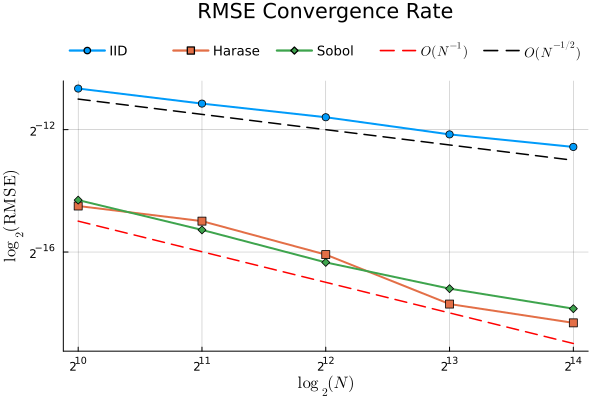

In [98]:
ms = [10, 11, 12, 13, 14]
N = 2 .^ ms  # sample sizes

p = plot(
            N, rmse_vec,xscale=:log2, yscale=:log2,
            xlabel=L"\log_2(N)", ylabel=L"\log_2(\mathrm{RMSE})",
            marker=:circle, linewidth=2, label="IID",
            grid=:true, gridalpha=0.3, legend=:outertop, legendcolumns=5, legendfontsize=9, legendborder=false, legend_foreground_color=:transparent)

plot!(p, N, rmse_vec_harase, marker=:square, linewidth=2, label="Harase")
plot!(p, N, rmse_vec_sobol,  marker=:diamond, linewidth=2, label="Sobol")
# reference lines
plot!(p, N, (2.0^-4.99) .* N.^(-1),linestyle=:dash, color=:red, linewidth=1.5, label=L"O(N^{-1})")
plot!(p, N, (2.0^-6) .* N.^(-0.5), linestyle=:dash, color=:black,linewidth=1.5, alpha=1, label=L"O(N^{-1/2})")

title!("RMSE Convergence Rate")

In [99]:
savefig(p, raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Plots\RMSE_Convergence_Rate.png")

"C:\\Users\\mussi\\Documents\\Manhattan\\Leuven\\MCQMC\\Plots\\RMSE_Convergence_Rate.png"

### **QUADRATIC FUNCTION CASE**

In [ ]:
# IID CASE
p = size(X, 2); b0= zeros(p); B0= Matrix{Float64}(I, p, p)*100; n0=5.0; s0=0.01
blm = UnMCQMC_linear(p, Y, X, b0, B0, n0, s0);

N = (2^12)-1; burn_in = 8; R = 100 

Random.seed!(1234)
iid = rand(p+1, N, R)

@time F_Lin_iid_12_100 = R_UbFkm(R, N, iid, blm, burn_in, x -> x);
@time quadratic_F_Lin_iid_12_100 = R_UbFkm(R, N, iid, blm, burn_in, x -> x.^2);

iid_post_mean = F_Lin_iid_12_100.mu_pool
iid_post_mean_quad = quadratic_F_Lin_iid_12_100.mu_pool
iid_post_var = iid_post_mean_quad - iid_post_mean.^2 

@save "quadratic_F_Lin_iid_12_100.jld2" iid_post_mean iid_post_mean_quad iid_post_var

println(post_var)

In [ ]:
p = size(X, 2); b0= zeros(p); B0= Matrix{Float64}(I, p, p)*100; n0=5.0; s0=0.01
blm = UnMCQMC_linear(p, Y, X, b0, B0, n0, s0);
f = x -> x

N = (2^12)-1; burn_in = 8; R = 100 
wcud_12_100 = digit_shift_mat(vec_wcud_12, p+1 , 100);

@time F_Lin_lfsr_12_100 = R_UbFkm(R, N, wcud_12_100, blm, burn_in, x -> x);
@time quadratic_F_Lin_lfsr_12_100 = R_UbFkm(R, N, wcud_12_100, blm, burn_in, x -> x.^2);

lfsr_post_mean = F_Lin_lfsr_12_100.mu_pool
lfsr_post_mean_quad = quadratic_F_Lin_lfsr_12_100.mu_pool
lfsr_post_var = lfsr_post_mean_quad - lfsr_post_mean.^2 

@save "quadratic_F_Lin_iid_12_100.jld2" lfsr_post_mean lfsr_post_mean_quad lfsr_post_var

println(post_var)

188.613886 seconds (477.98 M allocations: 365.205 GiB, 16.04% gc time, 1.83% compilation time)
758.312115 seconds (2.18 G allocations: 1.650 TiB, 15.13% gc time, 0.06% compilation time)


LoadError: UndefVarError: `post_mean_quad` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

## **PROBIT REGRESSION**

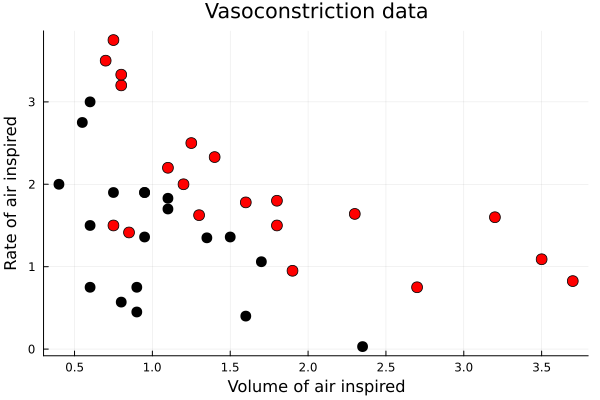

In [25]:
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\\"
df_vaso = CSV.read(folder_path * "DB_Vaso.csv", DataFrame)
rename!(df_vaso, [:x1, :x2, :y])

scatter(
    df_vaso.x1, df_vaso.x2,
    group = df_vaso.y,
    markershape = :circle,
    markersize = 6,
    palette = ["black", "red"],   # y=0 nero, y=1 rosso
    xlabel = "Volume of air inspired",
    ylabel = "Rate of air inspired",
    title = "Vasoconstriction data",
    legend = false
)

### **GML: Probit Model**

In [ ]:
@time probit = glm(@formula(y ~ x1+ x2), df_vaso, Binomial(), ProbitLink())

### **Gibbs: Albert & Chib 1993**

In [26]:
d = size(df_vaso)[1]; p = size(df_vaso)[2] 
Y = Vector(df_vaso.y); X = hcat(ones(d), Matrix(df_vaso[:, 1:2]));

In [42]:
wcud_12_100 = digit_shift_mat(vec_wcud_12, d+p , 100);
wcud_16_100 = digit_shift_mat(vec_wcud_16, d+p, 100);

**Biased Gibbs Sampler (MCQMC)**

In [28]:
# BPM = Probit_Gibbs_WCUD(X, Y)
# d, N, R = size(wcud_12_100)
# @time Probit_wcud_12_100 = Probit_Gibbs_sampler(BPM, wcud_12_100, N, 500, R);

# df = DataFrame(
#     Coeff    = vec(Probit_wcud_12_100.mean_post_dist),
#     Std_Err  = sqrt.(Probit_wcud_12_100.Var_Beta)
# )

# println(df)

In [29]:
# iid_100 = rand(d+p, N, R);
# @time Probit_iid_12_100 = Probit_Gibbs_sampler(BPM, iid_100, N, 500, R);

# df = DataFrame(
#     Coeff    = vec(Probit_iid_12_100.mean_post_dist),
#     Std_Err  = sqrt.(Probit_iid_12_100.Var_Beta)
# )

# println(df)

In [ ]:
# d, N, R = size(wcud_16_100)
# @time Probit_wcud_16_100 = Probit_Gibbs_sampler(BPM, wcud_16_100, N, 500, R);

# println(DataFrame(
#                     Coeff    = vec(Probit_wcud_16_100.mean_post_dist),
#                     Std_Err  = sqrt.(Probit_wcud_16_100.Var_Beta)
#                 ))

In [ ]:
# R = 100
# iid_100 = rand(d+p, N, R);
# @time Probit_iid_16_100 = Probit_Gibbs_sampler(BPM, iid_100, N, 500, R);

# df = DataFrame(
#     Coeff    = vec(Probit_iid_16_100.mean_post_dist),
#     Std_Err  = sqrt.(Probit_iid_16_100.Var_Beta)
# )

# println(df)

**BIASED Gibbs Sampler (ubMCQMC)**

In [30]:
# IID CASE
probit_unmcqmc = UnMCQMC_probit(Y, X);
N = (2^12)-1; R = 100; seq = rand(p+d, N, R); burn_in = 8;

@time F_Prob_iid = R_Fkm_probit(probit_unmcqmc, seq, N, burn_in, R, x -> x);

println(DataFrame(
                    Coeff   = vec(F_Prob_iid.mu_pool),
                    Std_Err = sqrt.(vec(F_Prob_iid.sigma_pool))
                ))

  5.808344 seconds (14.01 M allocations: 1.749 GiB, 4.16% gc time, 78.86% compilation time)
3×2 DataFrame
 Row │ Coeff     Std_Err    
     │ Float64   Float64    
─────┼──────────────────────
   1 │ -5.73854  0.0104746
   2 │  2.3475   0.00519492
   3 │  1.63604  0.0027227


In [31]:

N = (2^12)-1; R = 100; seq = wcud_12_100; burn_in = 8;

@time F_Prob_wcud_12_100 = R_Fkm_probit(probit_unmcqmc, wcud_12_100, N, burn_in, R, x -> x);

println(DataFrame(
                    Coeff   = vec(F_Prob_wcud_12_100.mu_pool),
                    Std_Err = sqrt.(vec(F_Prob_wcud_12_100.sigma_pool))
                ))

  1.393730 seconds (12.37 M allocations: 1.668 GiB, 13.63% gc time, 7.33% compilation time)
3×2 DataFrame
 Row │ Coeff     Std_Err     
     │ Float64   Float64     
─────┼───────────────────────
   1 │ -5.73526  0.00119509
   2 │  2.34471  0.000568063
   3 │  1.63581  0.000338775


In [ ]:
d, N, R = size(wcud_16_100)
@time F_Prob_wcud_16_100 = R_Fkm_probit(probit_unmcqmc, wcud_16_100, N, burn_in, R, x -> x);

println(DataFrame(
                    Coeff    = vec(Probit_wcud_16_100.mean_post_dist),
                    Std_Err  = sqrt.(Probit_wcud_16_100.Var_Beta)
                ))

**UNBIASED Gibbs Sampler (unMCQMC)**

In [32]:
N = (2^12)-1; R = 100; seq = rand(42, N, R); burn_in = 8;
probit_unmcqmc = UnMCQMC_probit(Y, X);

In [33]:
# IID CASE
@time unF_Prob_iid  = R_UbFkm_probit(probit_unmcqmc, seq, N, burn_in, R, x -> x);

println(DataFrame(
                    Coeff   = vec(unF_Prob_iid.mu_pool),
                    Std_Err = sqrt.(vec(unF_Prob_iid.sigma_pool))
                ))

  3.271273 seconds (15.02 M allocations: 1.906 GiB, 10.37% gc time, 47.15% compilation time)
3×2 DataFrame
 Row │ Coeff     Std_Err    
     │ Float64   Float64    
─────┼──────────────────────
   1 │ -5.73675  0.0108603
   2 │  2.34425  0.00538838
   3 │  1.63715  0.00281776


In [36]:
rmse_prob_iid_12 = sqrt(sum(unF_Prob_iid.sigma_pool))
println("RMSE:", rmse_prob_iid_12)

RMSE:0.012446735400563234


In [45]:
# HARASE'S LFSR

@time unF_Prob_wcud_12_100  = R_UbFkm_probit(probit_unmcqmc, wcud_12_100, N, burn_in, R, x -> x);

println(DataFrame(
                    Coeff   = vec(unF_Prob_wcud_12_100.mu_pool),
                    Std_Err = sqrt.(vec(unF_Prob_wcud_12_100.sigma_pool))
                ))

  1.570891 seconds (12.44 M allocations: 1.774 GiB, 14.87% gc time, 16.50% compilation time)
3×2 DataFrame
 Row │ Coeff     Std_Err     
     │ Float64   Float64     
─────┼───────────────────────
   1 │ -5.73447  0.00113324
   2 │  2.34444  0.000550616
   3 │  1.63553  0.000310412


In [46]:
rmse_prob_wcud_12 = sqrt(sum(unF_Prob_wcud_12_100.sigma_pool))
println("RMSE:", rmse_prob_wcud_12)

RMSE:0.0012976025079338472


In [39]:
# SOBOL PTS
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\Pts\\" 
sobol_12_d42 = CSV.read(folder_path * "sobol_42d.txt", Tables.matrix; header=false, delim = ' ', ignorerepeated = true);
array_sobol_12_d42 = digital_shift(sobol_12_d42[2:end,:], 100);          # digital shift on d-dim sobol (no zero vector, since there the inverse probability function is not defined)
# size(array_sobol_12_d42)  gives (42, 4095, 100)

@time unF_Prob_sob  = R_UbFkm_probit(probit_unmcqmc, array_sobol_12_d42, N, burn_in, R, x -> x);


println(DataFrame(
                    Coeff   = vec(unF_Prob_sob.mu_pool),
                    Std_Err = sqrt.(vec(unF_Prob_sob.sigma_pool))
                ))

  2.762346 seconds (12.44 M allocations: 1.774 GiB, 53.48% gc time, 9.30% compilation time)
3×2 DataFrame
 Row │ Coeff     Std_Err     
     │ Float64   Float64     
─────┼───────────────────────
   1 │ -5.41551  0.000623337
   2 │  2.20445  0.000288808
   3 │  1.54466  0.000170557


In [38]:
rmse_prob_sob_12 = sqrt(sum(unF_Prob_sob.sigma_pool))
println("RMSE:", rmse_prob_sob_12)

RMSE:0.0006327206068056584


In [ ]:
# N = (2^16)-1; R = 100; seq = wcud_16_100; burn_in = 500;
# @time unF_Prob_wcud_16_100  = R_UbFkm_probit(probit_unmcqmc, seq, N, burn_in, R, x -> x);

# println(DataFrame(
#                     Coeff   = vec(unF_Prob_wcud_16_100.mu_pool),
#                     Std_Err = sqrt.(vec(unF_Prob_wcud_16_100.sigma_pool))
#                 ))

### **Hierarchical Poisson-Gamma**  
https://mambajl.readthedocs.io/en/latest/examples/pumps.html

In [47]:
# DATA IMPORT AND TRANSFORMATION
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\\"
df_pump = CSV.read(folder_path * "DB_Nuclear_Pumps.csv", DataFrame)
Y = Vector(df_pump.Failures); X = Vector(df_pump.Time);

In [48]:
N = (2^12)-1; p = length(Y)+1; R= 100; Burn_in = 1000;
HPG = H_Poisson_Gamma(Y, X);

In [49]:
# IID CASE
seq = rand(p, N, R);
@time HPG_IID = HPG_Gibbs_sampler(HPG, seq, N, Burn_in, R);

println(DataFrame(
                    Coeff   = vcat(vec(HPG_IID.lambda_post_mean), HPG_IID.beta_post_mean),
                    Std_Err = sqrt.(vcat(vec(HPG_IID.var_lambdas), HPG_IID.var_beta))
                ))

  3.820192 seconds (1.22 M allocations: 121.776 MiB, 29.56% compilation time)
11×2 DataFrame
 Row │ Coeff     Std_Err     
     │ Float64   Float64     
─────┼───────────────────────
   1 │ 0.070242  4.94541e-5
   2 │ 0.154456  0.000155046
   3 │ 0.104052  8.02049e-5
   4 │ 0.123154  5.73936e-5
   5 │ 0.627157  0.00053537
   6 │ 0.61336   0.000265105
   7 │ 0.825437  0.00106752
   8 │ 0.82615   0.00104592
   9 │ 1.29531   0.00106408
  10 │ 1.84182   0.000737871
  11 │ 2.48691   0.0403556


In [ ]:
rmse_hbm_iid_12 = sqrt(sum(vcat(vec(HPG_IID.var_lambdas)))+HPG_IID.var_beta)
println("RMSE:", rmse_hbm_iid_12)

RMSE:0.040408855259841434


In [50]:
# Harase's LFSR 
wcud_12_100 = digit_shift_mat(vec_wcud_12, p , 100);

@time HPG_wcud_12 = HPG_Gibbs_sampler(HPG, wcud_12_100, N, Burn_in, R);

println(DataFrame(
                    Coeff   = vcat(vec(HPG_wcud_12.lambda_post_mean), HPG_wcud_12.beta_post_mean),
                    Std_Err = sqrt.(vcat(vec(HPG_wcud_12.var_lambdas), HPG_wcud_12.var_beta))
                ))

  2.878728 seconds (249 allocations: 60.420 MiB)
11×2 DataFrame
 Row │ Coeff      Std_Err     
     │ Float64    Float64     
─────┼────────────────────────
   1 │ 0.0702756  2.10445e-5
   2 │ 0.1542     0.000109889
   3 │ 0.104065   2.5681e-5
   4 │ 0.123214   1.39247e-5
   5 │ 0.626472   0.00022214
   6 │ 0.613406   0.000115143
   7 │ 0.824061   0.000400667
   8 │ 0.82327    0.000444066
   9 │ 1.29586    0.000471201
  10 │ 1.8408     0.000349268
  11 │ 2.48949    0.0343402


In [53]:
rmse_hbm_wcud_12 = sqrt(sum(vcat(vec(HPG_wcud_12.var_lambdas)))+HPG_wcud_12.var_beta)
println("RMSE:", rmse_hbm_wcud_12)

RMSE:0.034351520775570805


In [54]:
# SOBOL PTS
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\Pts\\" 
sobol_12_d11 = CSV.read(folder_path * "sobol_11d.txt", Tables.matrix; header=false, delim = ' ', ignorerepeated = true);
array_sobol_12_d11 = digital_shift(sobol_12_d11[2:end,:], 100);  

@time HPG_sob_12 = HPG_Gibbs_sampler(HPG, array_sobol_12_d11, N, Burn_in, R);

println(DataFrame(
                    Coeff   = vcat(vec(HPG_sob_12.lambda_post_mean), HPG_sob_12.beta_post_mean),
                    Std_Err = sqrt.(vcat(vec(HPG_sob_12.var_lambdas), HPG_sob_12.var_beta))
                ))

  2.765675 seconds (249 allocations: 60.420 MiB)
11×2 DataFrame
 Row │ Coeff      Std_Err    
     │ Float64    Float64    
─────┼───────────────────────
   1 │ 0.0702657  1.58818e-6
   2 │ 0.154074   6.47712e-6
   3 │ 0.104076   3.06549e-6
   4 │ 0.123221   1.98741e-6
   5 │ 0.626058   2.45759e-5
   6 │ 0.613411   9.29372e-6
   7 │ 0.81609    8.07805e-5
   8 │ 0.820241   5.95592e-5
   9 │ 1.29173    6.28666e-5
  10 │ 1.84029    2.33012e-5
  11 │ 2.48381    0.0730492


In [55]:
rmse_hbm_sob_12 = sqrt(sum(vcat(vec(HPG_sob_12.var_lambdas)))+HPG_sob_12.var_beta)
println("RMSE:", rmse_hbm_sob_12)

RMSE:0.07304930096213266


In [ ]:
include("4.1.R_Replicates.jl")



######################################################## TESTING: FUNCTIONS AND ESTIMATOR #################################################





######################################################## BOSTON HOUSING DATASET ########################################################
# DATA IMPORT AND TRANSFORMATION
# https://github.com/Jiarui-Du/ubmcqmc/blob/master/data_model.m

folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\UnMCQMC (He and Du)\Codes\Data\\"
df_boston = CSV.read(folder_path * "DB_Boston.txt", DataFrame)
M_boston = Matrix(df_boston)
r,c = size(M_boston)

Y = log.(M_boston[:, end])
X = [ones(r,1)  M_boston[:, 1:end-1]]           # incercept
X[:,6] = X[:,6].^2
X[:,7] = X[:,7].^2
X[:,9] = log.(X[:,9])
X[:,10] = log.(X[:,10])
X[:,14] = log.(X[:,14])

# Parameter initialisation -- pag 14 (He, and Du 2024) --
p = size(X, 2); b0= zeros(p); B0= Matrix{Float64}(I, p, p)*100; n0=5.0; s0=0.01
N = 20000
WCUD_seq = rand(p+1, N)
blm = UnMCQMC_linear(p, Y, X, b0, B0, n0, s0)
@time Mean_Posterior = F_k_m(N,CUD_seq, blm, 500, x -> x)

# 0.897079 seconds

# Term     Coef.
# x1    4.562779225948906
# x2   -0.01182486512073814
# x3    0.00005050747653669512
# x4    0.00006312596509550238
# x5    0.09141417758583727
# x6   -0.6337244878998968
# x7    0.0063009519259636035
# x8    0.00011615745984262865
# x9   -0.19030643719345725
# x10   0.09309843445569665
# x11  -0.00040631302110001935
# x12  -0.03127872719794009
# x13   0.0003645383979063723
# x14  -0.372841298193898
# Sigma   0.03314326957355439

# Mean Square Error 
mean((Y - X * Mean_Posterior[1:end-1]).^2)


# OLS 
@time ols = lm(X[:,1:end], Y)

#   1.021749 seconds
# -----------------------------------------------------------------
#   Term     Coef.       Std. Error     t       Pr(>|t|)   Lower 95%    Upper 95%
# -----------------------------------------------------------------
# x1    4.56578      0.154755      29.50    <1e-99   4.26172       4.86984
# x2   -0.011835     0.00124547    -9.50    <1e-19  -0.0142821    -0.00938789
# x3    5.17744e-5   0.000506807    0.10    0.9187  -0.000944004   0.00104755
# x4    4.30655e-5   0.00237506     0.02    0.9855  -0.00462346    0.00470959
# x5    0.0912068    0.0332114      2.75    0.0062   0.0259528     0.156461
# x6   -0.634756     0.113236      -5.61    <1e-07  -0.857242     -0.41227
# x7    0.00628201   0.00131369     4.78    <1e-05   0.00370087    0.00886316
# x8    0.000110762  0.00052691     0.21    0.8336  -0.000924515   0.00114604
# x9   -0.190859     0.033404      -5.71    <1e-07  -0.256491     -0.125226
# x10   0.0930878    0.0193767      4.80    <1e-05   0.0550163     0.131159
# x11  -0.000406041  0.000123814   -3.28    0.0011  -0.000649313  -0.00016277
# x12  -0.0313095    0.00501913    -6.24    <1e-09  -0.0411712    -0.0214479
# x13   0.00036292   0.000103146    3.52    0.0005   0.000160258   0.000565582
# x14  -0.372639     0.0250742    -14.86    <1e-40  -0.421905     -0.323373

# Mean Square Error
mean((Y- X*coef(ols)).^2)




########################################################## CALIFORNIA HOUSING DATASET ######################################################
# DATA IMPORT AND TRANSFORMATION
# https://github.com/Jiarui-Du/ubmcqmc/blob/master/data_model.m

folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\PhD Codes\UnMCQMC (He and Du)\Data\\"
df_california = CSV.read(folder_path * "DB_California_Housing.txt", DataFrame)

#=
        Data = load('./data/california_housing_data.txt');
        data = Data;
        households = round(Data(:,5)./Data(:,6)); % households
        data(:,3) = round(Data(:,3).*households); % total_rooms
        data(:,4) = round(Data(:,4).*households); % total_bedrooms
        colNames = ["median_income","housing_median_age","total_rooms","total_bedrooms",...
            "population","avePopulation","latitude","longitude"];
        Y = log(data(:,end).*100000);
        y = log(data(:,end));
        m = length(y);
        X(:,1) = ones(m,1);
        X(:,2:4) = [data(:,1),data(:,1).^2,data(:,1).^3];% Income
        X(:,5) = log(data(:,2));
        X(:,6) = log(data(:,3)./data(:,5));
        X(:,7) = log(data(:,4)./data(:,5));
        X(:,8) = log(data(:,6));
        X(:,9) = log(households);
        p = size(X,2);
        d = p+1;
        b0 = zeros(p,1);
        B0 = 100*eye(p);
        n0 = 5;
        s0 = 0.01;
=# 






##################################### Probit Regression  #############################################
## DATA IMPORT AND TRANSFORMATION
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data_Libraries\\"
df_vaso = CSV.read(folder_path * "DB_Vaso.csv", DataFrame)
rename!(df_vaso, [:x1, :x2, :y])

scatter(
    df_vaso.x1, df_vaso.x2,
    group = df_vaso.y,
    markershape = :circle,
    markersize = 6,
    palette = ["black", "red"],   # y=0 nero, y=1 rosso
    xlabel = "Volume of air inspired",
    ylabel = "Rate of air inspired",
    title = "Vasoconstriction data",
    legend = false
)

Y = df_vaso[:,end]; X = Matrix(df_vaso[:, 1:2])

##  GLM: Probit Model 
@time probit = glm(@formula(y ~ x1+ x2), df_vaso, Binomial(), ProbitLink())

# 3.135882 seconds (2.95 M allocations: 148.579 MiB, 1.62% gc time, 99.20% compilation time)

# y ~ 1 + x1 + x2

# Coefficients:    coeff > 0, positive effect on p(Y=1|X)
# ────────────────────────────────────────────────────────────────────────
#                 Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
# ────────────────────────────────────────────────────────────────────────
# (Intercept)  -5.19454    1.59339   -3.26    0.0011  -8.31752    -2.07156
# x1            2.11804    0.717416   2.95    0.0032   0.711934    3.52415
# x2            1.47643    0.46176    3.20    0.0014   0.571401    2.38147
# ────────────────────────────────────────────────────────────────────────

aic(probit); bic(probit)